In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
def get_NBA_statas():
    year = input('Which NBA season are you interested in?: ')
    player = input('For which player do you want to get stats on?: ')
    return year,player

In [3]:
year,player = get_NBA_statas()

Which NBA season are you interested in?: 2020
For which player do you want to get stats on?: sc


In [4]:
url = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'.format(year)
r = requests.get(url)
r_html = r.text
soup = BeautifulSoup(r_html,'html.parser')

In [8]:
table = soup.find_all(class_='full_table')
head = soup.find(class_='thead')
print(head)
column_raw = [head.text for item in head][0]
column_names = column_raw.replace('\n',',').split(',')[2:-1]
#column_names

<tr class="thead">
<th aria-label="Rank" class="ranker sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="Rank">Rk</th>
<th aria-label="Player" class="sort_default_asc center" data-stat="player">Player</th>
<th aria-label="Position" class="sort_default_asc center" data-stat="pos" data-tip="Position">Pos</th>
<th aria-label="Player's age on February 1 of the season" class="sort_default_asc center" data-stat="age" data-tip="Player's age on February 1 of the season">Age</th>
<th aria-label="Team" class="sort_default_asc center" data-stat="team_id" data-tip="Team">Tm</th>
<th aria-label="Games" class="center" data-stat="g" data-tip="Games">G</th>
<th aria-label="Games Started" class="center" data-stat="gs" data-tip="Games Started">GS</th>
<th aria-label="Minutes Played Per Game" class="hide_non_quals center" data-stat="mp_per_g" data-tip="Minutes Played Per Game">MP</th>
<th aria-label="Field Goals Per Game" class="hide_non_quals center" data-stat="fg_per_g" da

In [6]:
print(len(table))
for i in range(len(table)):
    print(table[i],'\n')

529
<tr class="full_table"><th class="right" csk="1" data-stat="ranker" scope="row">1</th><td class="left" csk="Adams,Steven" data-append-csv="adamsst01" data-stat="player"><a href="/players/a/adamsst01.html">Steven Adams</a></td><td class="center" data-stat="pos">C</td><td class="right" data-stat="age">26</td><td class="left" data-stat="team_id"><a href="/teams/OKC/2020.html">OKC</a></td><td class="right" data-stat="g">63</td><td class="right" data-stat="gs">63</td><td class="right" data-stat="mp_per_g">26.7</td><td class="right" data-stat="fg_per_g">4.5</td><td class="right" data-stat="fga_per_g">7.6</td><td class="right" data-stat="fg_pct">.592</td><td class="right" data-stat="fg3_per_g">0.0</td><td class="right" data-stat="fg3a_per_g">0.0</td><td class="right non_qual" data-stat="fg3_pct">.333</td><td class="right" data-stat="fg2_per_g">4.5</td><td class="right" data-stat="fg2a_per_g">7.5</td><td class="right" data-stat="fg2_pct">.594</td><td class="right" data-stat="efg_pct">.593<

<tr class="full_table"><th class="right" csk="364" data-stat="ranker" scope="row">364</th><td class="left" csk="Napier,Shabazz" data-append-csv="napiesh01" data-stat="player"><a href="/players/n/napiesh01.html">Shabazz Napier</a></td><td class="center" data-stat="pos">PG</td><td class="right" data-stat="age">28</td><td class="left" data-stat="team_id">TOT</td><td class="right" data-stat="g">56</td><td class="right" data-stat="gs">32</td><td class="right" data-stat="mp_per_g">24.0</td><td class="right" data-stat="fg_per_g">3.4</td><td class="right" data-stat="fga_per_g">8.1</td><td class="right non_qual" data-stat="fg_pct">.412</td><td class="right" data-stat="fg3_per_g">1.4</td><td class="right" data-stat="fg3a_per_g">4.3</td><td class="right" data-stat="fg3_pct">.317</td><td class="right" data-stat="fg2_per_g">2.0</td><td class="right" data-stat="fg2a_per_g">3.9</td><td class="right non_qual" data-stat="fg2_pct">.519</td><td class="right non_qual" data-stat="efg_pct">.496</td><td clas

In [7]:
for i in range(len(table)):
    for i in table[i].find_all('td'):
        print(i.text)
    print('\n\n')

Steven Adams
C
26
OKC
63
63
26.7
4.5
7.6
.592
0.0
0.0
.333
4.5
7.5
.594
.593
1.9
3.2
.582
3.3
6.0
9.3
2.3
0.8
1.1
1.5
1.9
10.9



Bam Adebayo
PF
22
MIA
72
72
33.6
6.1
11.0
.557
0.0
0.2
.143
6.1
10.8
.564
.558
3.7
5.3
.691
2.4
7.8
10.2
5.1
1.1
1.3
2.8
2.5
15.9



LaMarcus Aldridge
C
34
SAS
53
53
33.1
7.4
15.0
.493
1.2
3.0
.389
6.2
12.0
.519
.532
3.0
3.6
.827
1.9
5.5
7.4
2.4
0.7
1.6
1.4
2.4
18.9



Kyle Alexander
PF
23
MIA
2
0
6.5
0.5
1.0
.500
0.0
0.0

0.5
1.0
.500
.500
0.0
0.0

1.0
0.5
1.5
0.0
0.0
0.0
0.5
0.5
1.0



Nickeil Alexander-Walker
SG
21
NOP
47
1
12.6
2.1
5.7
.368
1.0
2.8
.346
1.1
2.8
.391
.455
0.5
0.8
.676
0.2
1.6
1.8
1.9
0.4
0.2
1.1
1.2
5.7



Grayson Allen
SG
24
MEM
38
0
18.9
3.1
6.6
.466
1.5
3.7
.404
1.6
2.9
.545
.580
1.0
1.2
.867
0.2
2.0
2.2
1.4
0.3
0.1
0.9
1.4
8.7



Jarrett Allen
C
21
BRK
70
64
26.5
4.3
6.6
.649
0.0
0.1
.000
4.3
6.6
.658
.649
2.4
3.9
.633
3.1
6.5
9.6
1.6
0.6
1.3
1.1
2.3
11.1



Kadeem Allen
SG
27
NYK
10
0
11.7
1.9
4.4
.432
0.5
1.6
.313
1.4
2.8
.500
.489


1.4
.603
1.0
2.7
3.6
0.8
0.8
0.2
1.1
2.2
6.9



Gorgui Dieng
C
30
TOT
63
17
17.4
2.6
5.8
.456
0.9
2.4
.355
1.8
3.4
.528
.530
1.2
1.6
.772
1.4
4.2
5.6
1.2
0.8
0.9
1.0
2.0
7.4



Spencer Dinwiddie
SG
26
BRK
64
49
31.2
6.6
16.0
.415
1.9
6.3
.308
4.7
9.7
.485
.476
5.4
7.0
.778
0.5
3.0
3.5
6.8
0.6
0.3
2.7
2.8
20.6



Donte DiVincenzo
SG
23
MIL
66
24
23.0
3.5
7.7
.455
1.3
3.7
.336
2.3
4.0
.567
.536
1.0
1.3
.733
1.0
3.8
4.8
2.3
1.3
0.3
1.4
1.7
9.2



Luka Dončić
PG
20
DAL
61
61
33.6
9.5
20.6
.463
2.8
8.9
.316
6.7
11.7
.574
.531
7.0
9.2
.758
1.3
8.1
9.4
8.8
1.0
0.2
4.3
2.5
28.8



Luguentz Dort
SG
20
OKC
36
28
22.8
2.4
6.1
.394
0.8
2.8
.297
1.6
3.3
.479
.463
1.2
1.5
.792
0.7
1.6
2.3
0.8
0.9
0.1
0.6
2.7
6.8



Damyean Dotson
SG
25
NYK
48
0
17.4
2.5
6.0
.414
1.2
3.4
.362
1.3
2.6
.480
.516
0.5
0.7
.667
0.2
1.7
1.9
1.2
0.5
0.1
0.4
0.9
6.7



Sekou Doumbouya
SF
19
DET
38
19
19.8
2.4
6.2
.390
0.7
2.6
.286
1.7
3.6
.464
.449
0.8
1.2
.674
0.5
2.6
3.1
0.5
0.5
0.2
0.9
2.1
6.4



PJ Dozier
PG
23
DEN
29
0


2.2
8.5



Tyus Jones
PG
23
MEM
65
6
19.0
3.0
6.6
.459
0.7
1.9
.379
2.3
4.7
.492
.514
0.7
0.9
.741
0.1
1.4
1.6
4.4
0.9
0.1
0.8
0.7
7.4



DeAndre Jordan
C
31
BRK
56
6
22.0
3.4
5.1
.666
0.0
0.0

3.4
5.1
.666
.666
1.5
2.2
.680
2.5
7.5
10.0
1.9
0.3
0.9
1.3
2.0
8.3



Cory Joseph
PG
28
SAC
72
26
24.4
2.4
5.7
.415
0.8
2.2
.352
1.6
3.5
.455
.483
0.8
1.0
.857
0.6
2.0
2.6
3.5
0.7
0.3
1.1
1.8
6.4



Mfiondu Kabengele
C
22
LAC
12
0
5.3
1.2
2.7
.438
0.8
1.7
.450
0.4
1.0
.417
.578
0.4
0.4
1.000
0.1
0.8
0.9
0.2
0.2
0.2
0.2
0.8
3.5



Frank Kaminsky
C
26
PHO
39
13
19.9
3.5
7.9
.450
1.1
3.2
.331
2.5
4.7
.530
.516
1.6
2.3
.678
0.9
3.6
4.5
1.9
0.4
0.3
0.9
1.9
9.7



Enes Kanter
C
27
BOS
58
7
16.9
3.4
6.0
.572
0.0
0.1
.143
3.4
5.9
.581
.573
1.2
1.7
.707
2.8
4.6
7.4
1.0
0.4
0.7
1.0
1.7
8.1



Luke Kennard
SG
23
DET
28
25
32.9
5.4
12.2
.442
2.6
6.5
.399
2.8
5.7
.491
.548
2.4
2.7
.893
0.3
3.2
3.5
4.1
0.4
0.2
1.5
2.3
15.8



Stanton Kidd
SF
27
UTA
4
0
3.8
0.0
0.8
.000
0.0
0.3
.000
0.0
0.5
.000
.000
0.0
0.0


Theo Pinson
SG
24
BRK
33
0
11.1
1.4
4.7
.290
0.5
2.4
.188
0.9
2.3
.400
.339
0.5
0.5
.938
0.3
1.3
1.6
1.7
0.5
0.1
1.0
1.1
3.6



Mason Plumlee
C
29
DEN
61
1
17.3
2.9
4.7
.615
0.0
0.1
.000
2.9
4.6
.625
.615
1.4
2.5
.535
1.6
3.6
5.2
2.5
0.5
0.6
1.3
2.3
7.2



Jakob Poeltl
C
24
SAS
66
18
17.7
2.5
4.0
.624
0.0
0.0

2.5
4.0
.624
.624
0.6
1.3
.465
2.0
3.7
5.7
1.8
0.6
1.4
0.8
1.9
5.6



Vincent Poirier
C
26
BOS
22
0
5.9
0.8
1.6
.472
0.0
0.1
.500
0.7
1.5
.471
.486
0.3
0.3
.857
0.6
1.4
2.0
0.4
0.1
0.4
0.4
1.1
1.9



Shamorie Ponds
PG
21
TOR
4
0
2.8
0.8
1.3
.600
0.3
0.5
.500
0.5
0.8
.667
.700
0.5
0.5
1.000
0.0
0.3
0.3
0.5
0.0
0.3
0.0
0.5
2.3



Jordan Poole
SG
20
GSW
57
14
22.4
2.9
8.8
.333
1.3
4.6
.279
1.6
4.2
.392
.406
1.7
2.1
.798
0.2
1.9
2.1
2.4
0.6
0.2
1.3
1.6
8.8



Kevin Porter Jr.
SF
19
CLE
50
3
23.2
3.7
8.4
.442
1.1
3.2
.335
2.7
5.3
.506
.505
1.5
2.0
.723
0.4
2.8
3.2
2.2
0.9
0.3
1.9
2.7
10.0



Michael Porter Jr.
PF
21
DEN
55
8
16.4
3.5
7.0
.509
1.1
2.7
.422
2.4
4.3
.564
.590
1.1
1.3
.83

In [8]:
players = []
for i in range(len(table)):
    player_ = []
    for td in table[i].find_all('td'):
        player_.append(td.text)
    players.append(player_)
df=pd.DataFrame(players, columns=column_names)
df

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,.592,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,.557,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,.493,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,Kyle Alexander,PF,23,MIA,2,0,6.5,0.5,1.0,.500,...,,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,.368,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,Trae Young,PG,21,ATL,60,60,35.3,9.1,20.8,.437,...,.860,0.5,3.7,4.3,9.3,1.1,0.1,4.8,1.7,29.6
525,Cody Zeller,C,27,CHO,58,39,23.1,4.3,8.3,.524,...,.682,2.8,4.3,7.1,1.5,0.7,0.4,1.3,2.4,11.1
526,Tyler Zeller,C,30,SAS,2,0,2.0,0.5,2.0,.250,...,,1.5,0.5,2.0,0.0,0.0,0.0,0.0,0.0,1.0
527,Ante Žižić,C,23,CLE,22,0,10.0,1.9,3.3,.569,...,.737,0.8,2.2,3.0,0.3,0.3,0.2,0.5,1.2,4.4


In [9]:
df_luka = df[df['Player']=='Luka Dončić']
df_luka

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
133,Luka Dončić,PG,20,DAL,61,61,33.6,9.5,20.6,.463,...,.758,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8


In [10]:
import matplotlib.pyplot as plt
import matplotlib

In [11]:
apt = []
for i,j in zip(list(df['AST'].values),list(df['TOV'].values)):
    if float(j)!=0:
        apt.append(float(i)/float(j))
    elif float(j)==0 and float(i)<3:
        apt.append(0)
    else:
        apt.append(float(i)*3)
df['A/T'] = apt

In [12]:
import numpy as np

In [13]:
df_pg = df[df['Pos']=='PG']
df_pg[['G','PTS','AST']] = df_pg[['G','PTS','AST']].astype(float)
# df_gpg = df_pg[(df_pg['PTS']>=15.0) & (df_pg['AST']>=5.0)]
df_gpg = df_pg[(df_pg['PTS']>=15.0) & (df_pg['AST']>=5.0) & (df_pg['G']>40)]
df_gpg

D:\Anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,A/T
67,Malcolm Brogdon,PG,27,IND,54.0,54,30.9,6.0,13.8,.438,...,0.9,4.0,4.9,7.1,0.6,0.2,2.4,1.8,16.5,2.958333
133,Luka Dončić,PG,20,DAL,61.0,61,33.6,9.5,20.6,.463,...,1.3,8.1,9.4,8.8,1.0,0.2,4.3,2.5,28.8,2.046512
138,Goran Dragić,PG,33,MIA,59.0,3,28.2,5.4,12.3,.441,...,0.5,2.7,3.2,5.1,0.7,0.2,2.4,2.1,16.2,2.125000
159,De'Aaron Fox,PG,22,SAC,51.0,49,32.0,7.7,16.0,.480,...,0.7,3.2,3.8,6.8,1.5,0.5,3.1,2.8,21.1,2.193548
179,Devonte' Graham,PG,24,CHO,63.0,53,35.1,5.8,15.3,.382,...,0.7,2.7,3.4,7.5,1.0,0.2,2.9,1.8,18.2,2.586207
249,LeBron James,PG,35,LAL,67.0,67,34.6,9.6,19.4,.493,...,1.0,6.9,7.8,10.2,1.2,0.5,3.9,1.8,25.3,2.615385
296,Damian Lillard,PG,29,POR,66.0,66,37.5,9.5,20.4,.463,...,0.5,3.8,4.3,8.0,1.1,0.3,2.9,1.7,30.0,2.758621
302,Kyle Lowry,PG,33,TOR,58.0,58,36.2,5.8,13.8,.416,...,0.6,4.5,5.0,7.5,1.4,0.4,3.1,3.3,19.4,2.419355
348,Ja Morant,PG,20,MEM,67.0,67,31.0,6.7,14.0,.477,...,0.8,3.1,3.9,7.3,0.9,0.3,3.3,1.6,17.8,2.212121
395,Chris Paul,PG,34,OKC,70.0,70,31.5,6.2,12.7,.489,...,0.4,4.6,5.0,6.7,1.6,0.2,2.3,2.3,17.6,2.913043


In [14]:
df_trend = df_gpg[['AST','PTS','A/T']]
df_trend = df_trend.astype(float)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# print(df_trend.values)
regularized = scaler.fit_transform(df_trend)
df_trend_array = np.array(df_trend)
players = np.array(df_gpg['Player'])
df_gpgr = pd.DataFrame()
df_gpgr['Player'] = pd.Series(players)
df_gpgr['AST_r'] = pd.Series(regularized[:,0])
df_gpgr['PTS_r'] = pd.Series(regularized[:,1])
df_gpgr['A/T_r'] = pd.Series(regularized[:,2])
df_gpgr['AST'] = pd.Series(df_trend_array[:,0])
df_gpgr['PTS'] = pd.Series(df_trend_array[:,1])
df_gpgr['A/T'] = pd.Series(df_trend_array[:,2])
df_gpgr

,Player,AST_r,PTS_r,A/T_r,AST,PTS,A/T
0,Malcolm Brogdon,0.392157,0.021739,0.971154,7.1,16.5,2.958333
1,Luka Dončić,0.725490,0.913043,0.339893,8.8,28.8,2.046512
2,Goran Dragić,0.000000,0.000000,0.394231,5.1,16.2,2.125000
3,De'Aaron Fox,0.333333,0.355072,0.441687,6.8,21.1,2.193548
4,Devonte' Graham,0.470588,0.144928,0.713528,7.5,18.2,2.586207
5,LeBron James,1.000000,0.659420,0.733728,10.2,25.3,2.615385
6,Damian Lillard,0.568627,1.000000,0.832891,8.0,30.0,2.758621
7,Kyle Lowry,0.470588,0.231884,0.598015,7.5,19.4,2.419355
8,Ja Morant,0.431373,0.115942,0.454545,7.3,17.8,2.212121
9,Chris Paul,0.313725,0.101449,0.939799,6.7,17.6,2.913043


([], <a list of 0 Text xticklabel objects>)

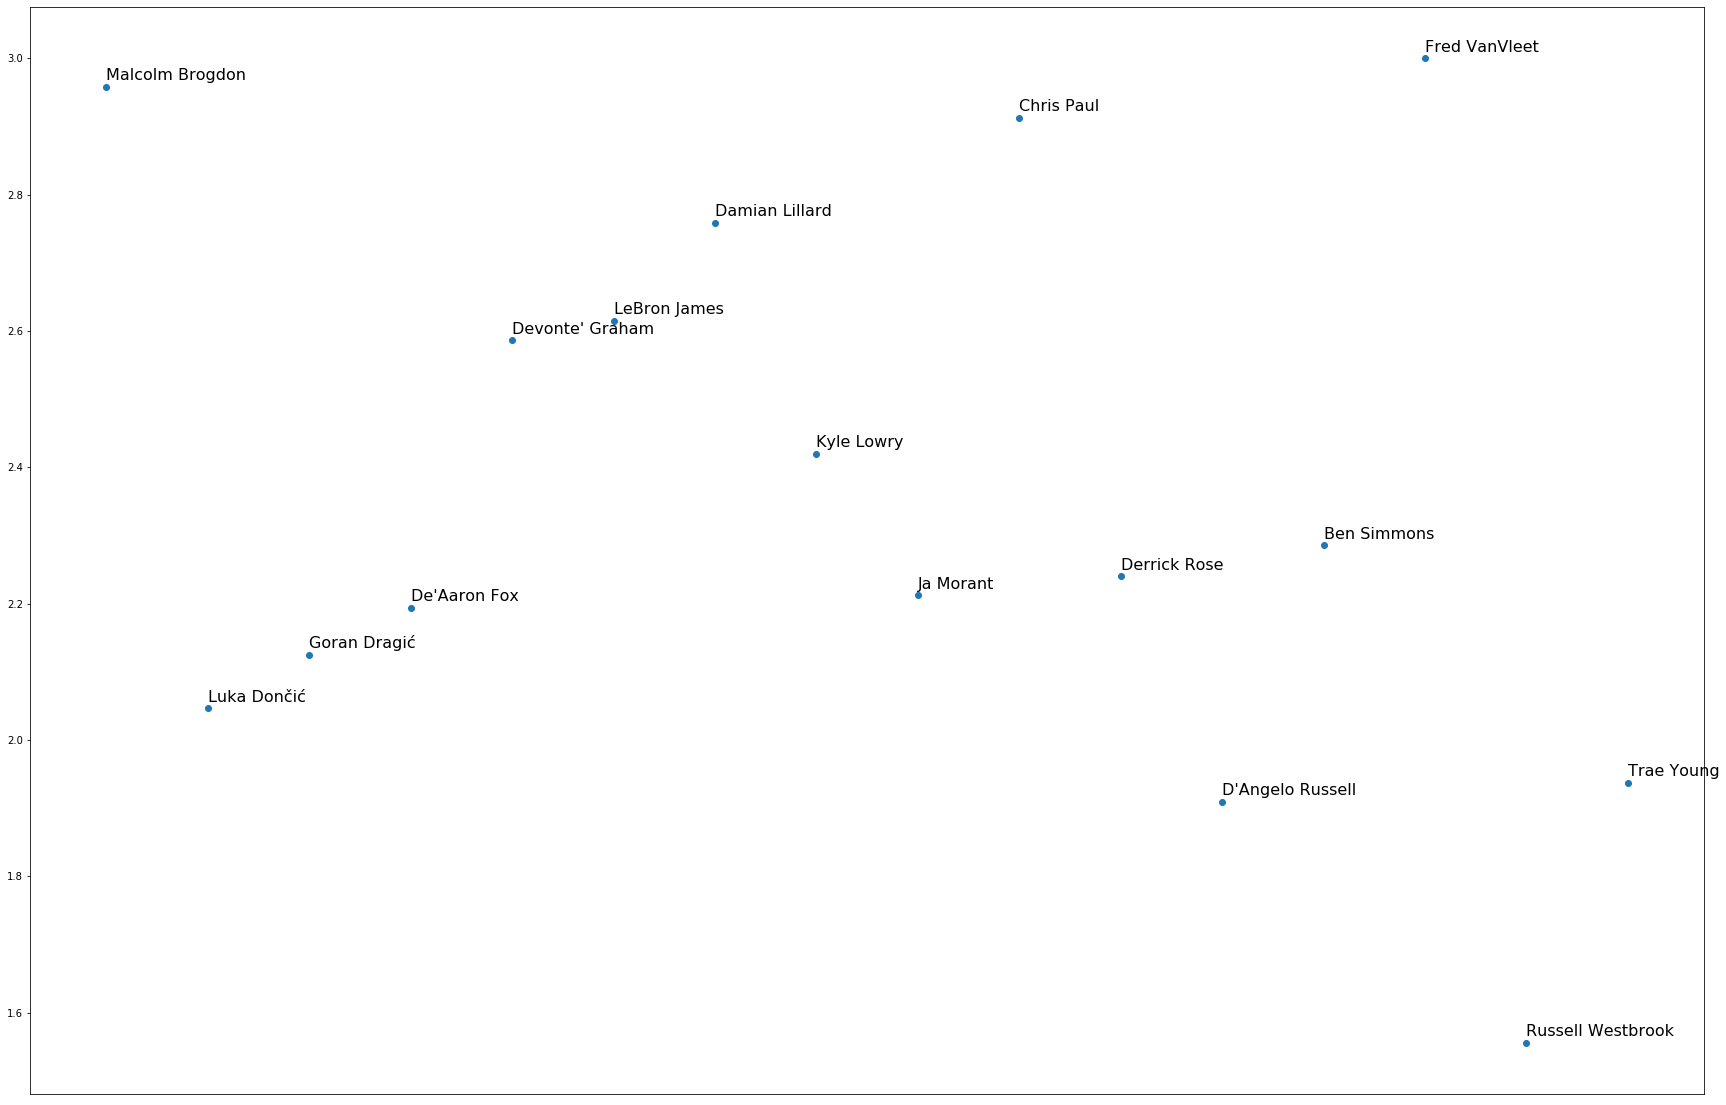

In [15]:
plt.figure(figsize=(30,20))
x = np.array(df_gpg['Player'])
y = np.array(df_gpgr['A/T'])
plt.scatter(x,y)
for i,j in zip(x,y):
    plt.annotate(i,(i,j+0.01),size=16,)
plt.xticks([])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


([], <a list of 0 Text xticklabel objects>)

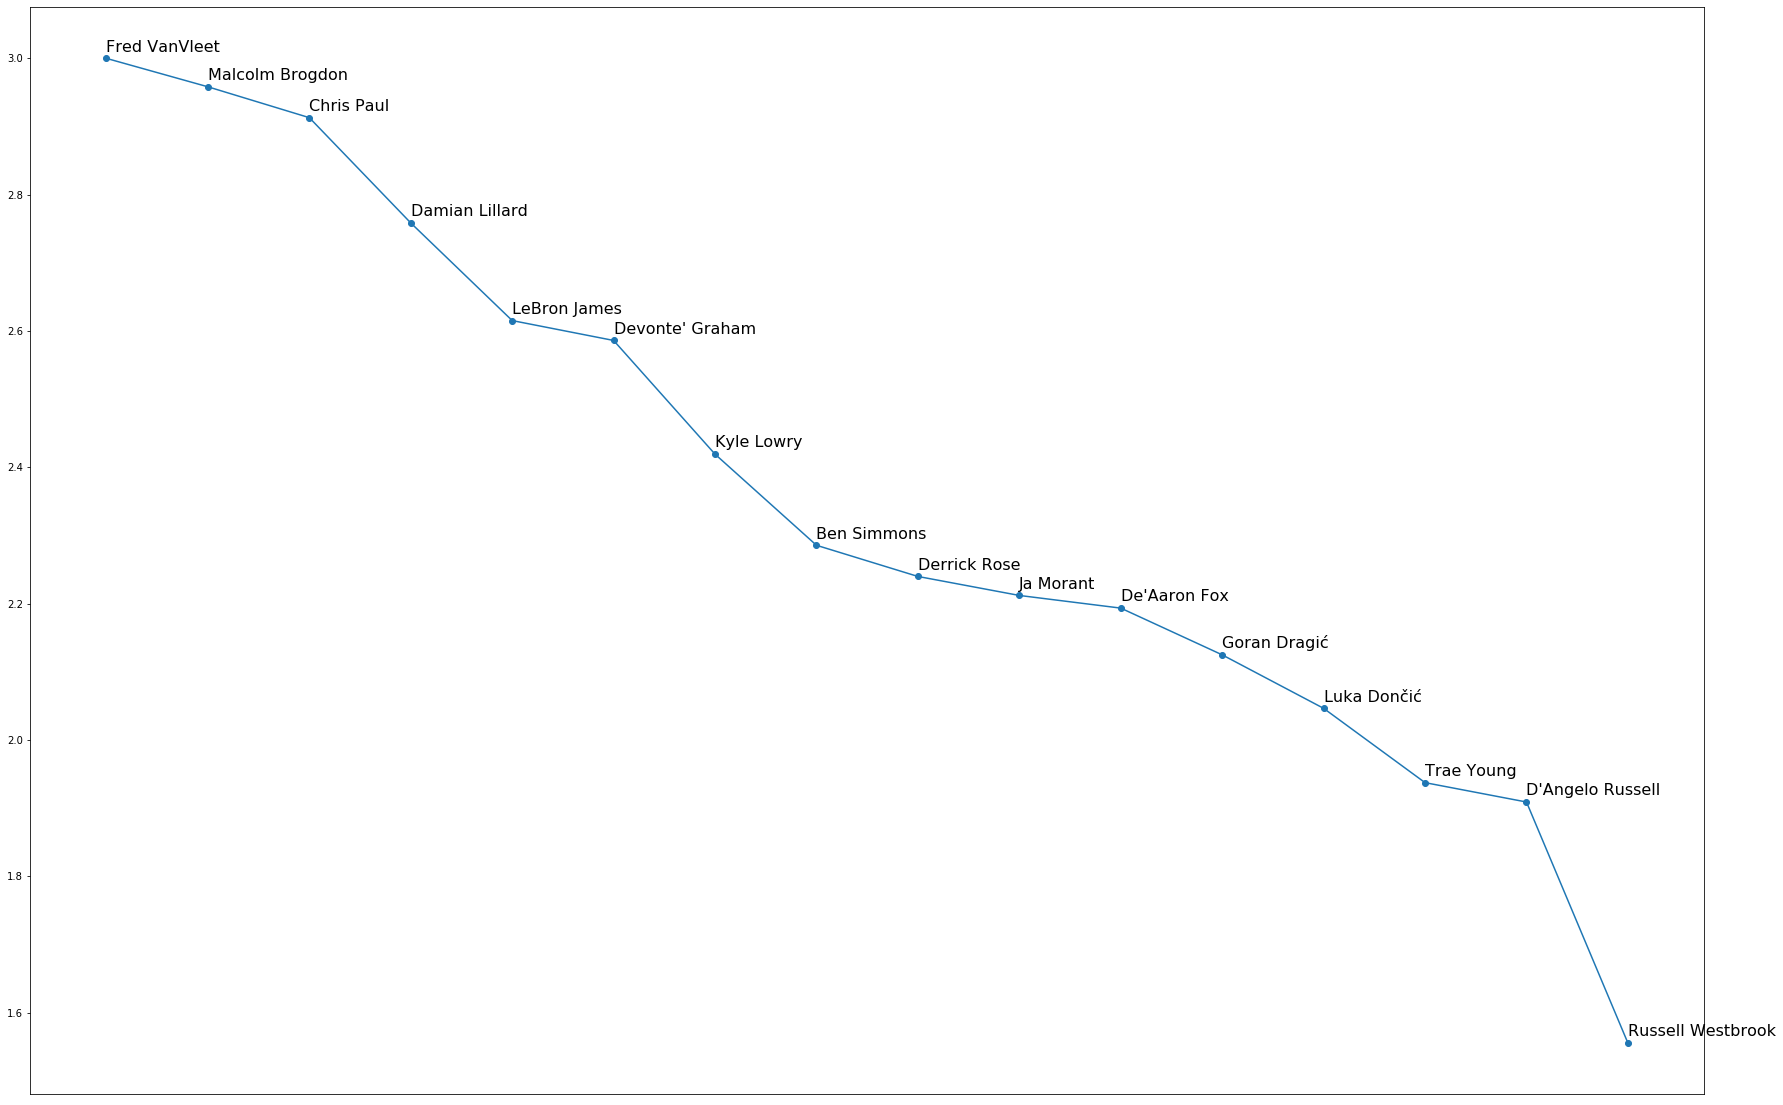

In [16]:
df_gpg.sort_values(by='A/T',inplace=True,ascending=False)
df_gpgr.sort_index(by='A/T',inplace=True,ascending=False)
plt.figure(figsize=(30,20))
x = np.array(df_gpg['Player'])
y = np.array(df_gpgr['A/T'])
plt.scatter(x,y)
plt.plot(x,y)
for i,j in zip(x,y):
    plt.annotate(i,(i,j+0.01),size=16,)
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

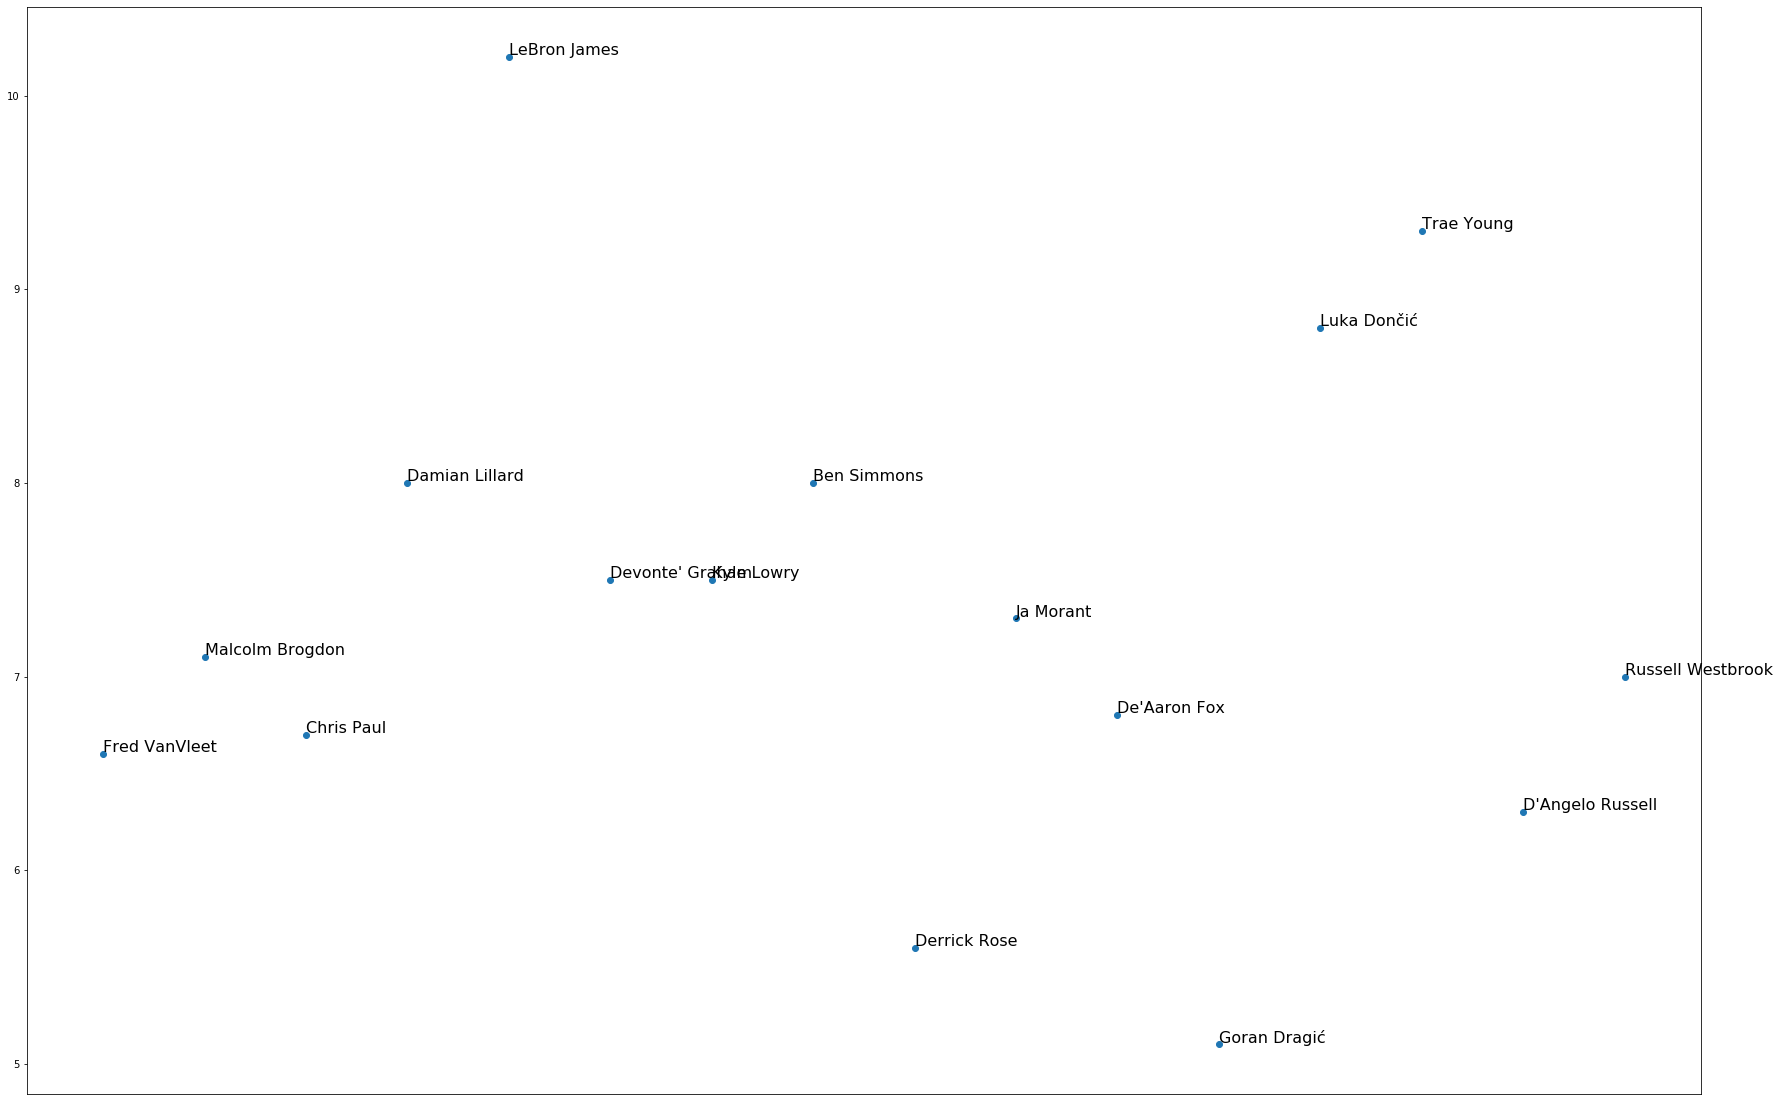

In [17]:
plt.figure(figsize=(30,20))
x = np.array(df_gpgr['Player'])
y = np.array(df_gpgr['AST'])
plt.scatter(x,y)
for i,j in zip(x,y):
    plt.annotate(i,(i,j+0.01),size=16,)
plt.xticks([])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


([], <a list of 0 Text xticklabel objects>)

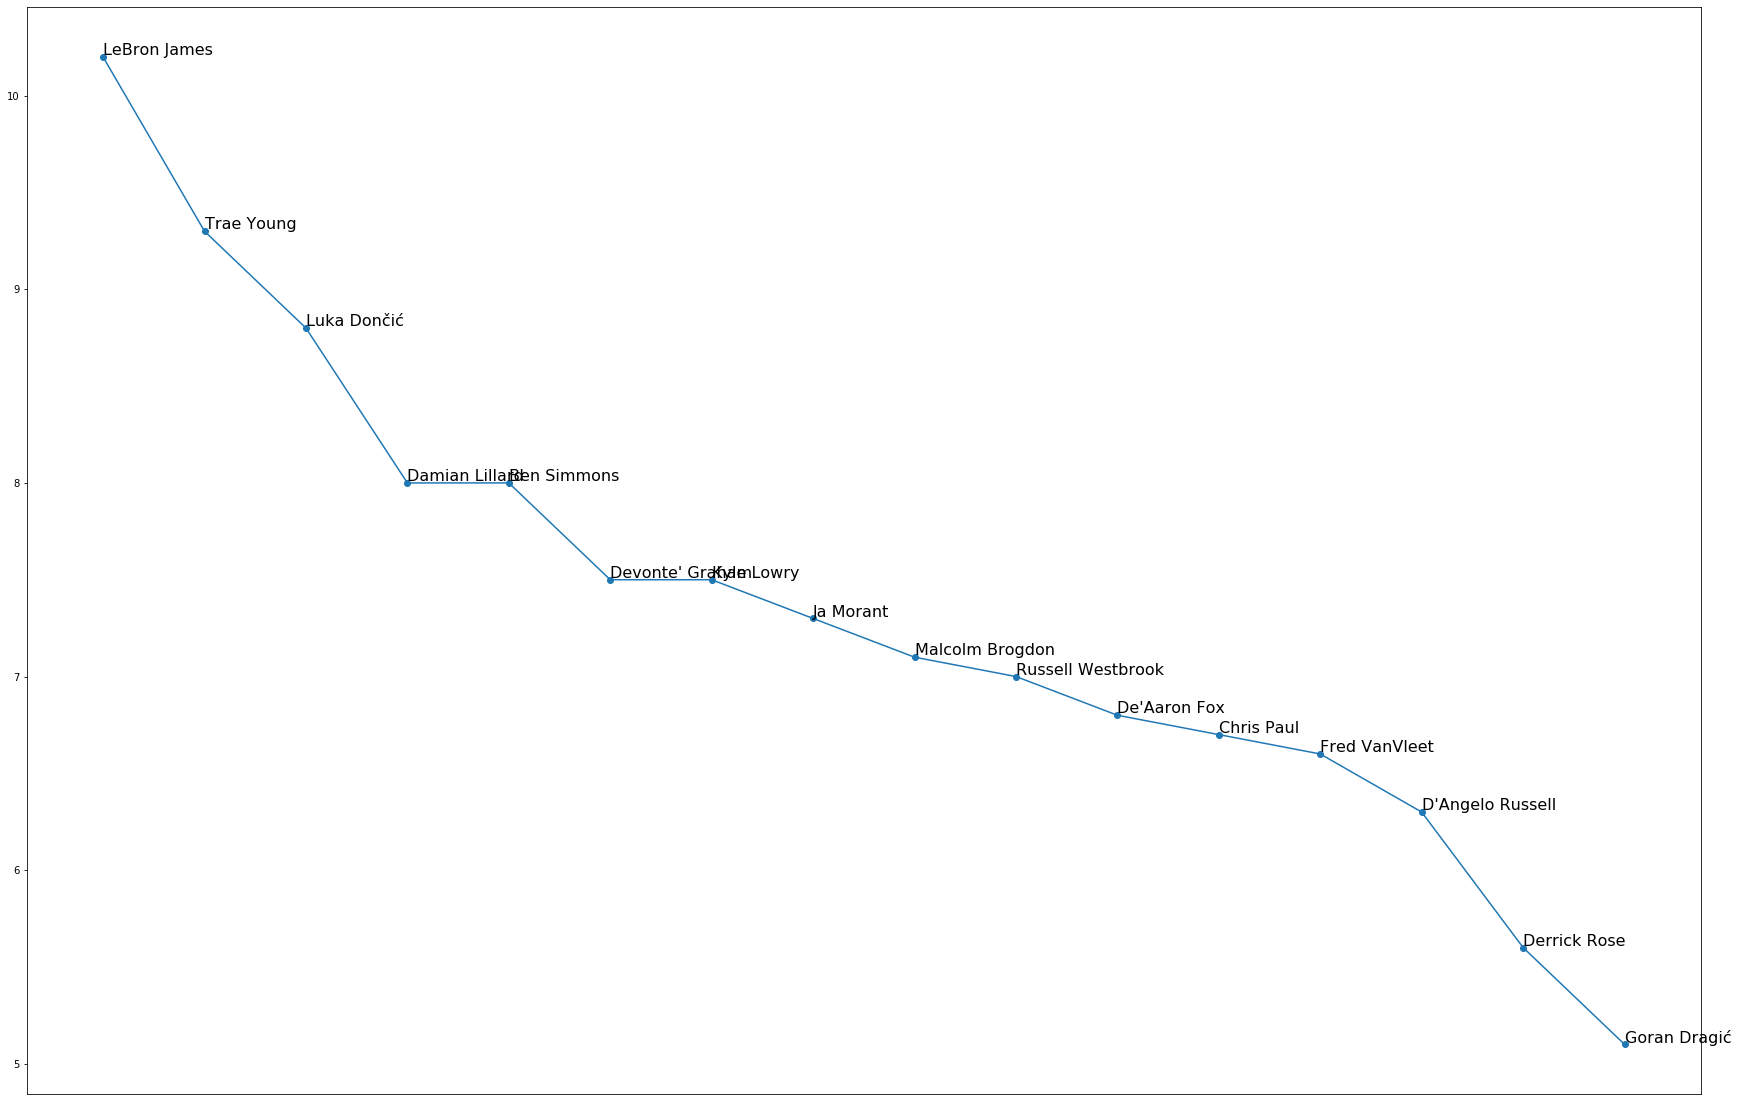

In [18]:
df_gpg.sort_values(by='AST',inplace=True,ascending=False)
df_gpgr.sort_index(by='AST',inplace=True,ascending=False)
plt.figure(figsize=(30,20))
x = np.array(df_gpg['Player'])
y = np.array(df_gpgr['AST'])
plt.scatter(x,y)
plt.plot(x,y)
for i,j in zip(x,y):
    plt.annotate(i,(i,j+0.01),size=16,)
plt.xticks([])

([], <a list of 0 Text xticklabel objects>)

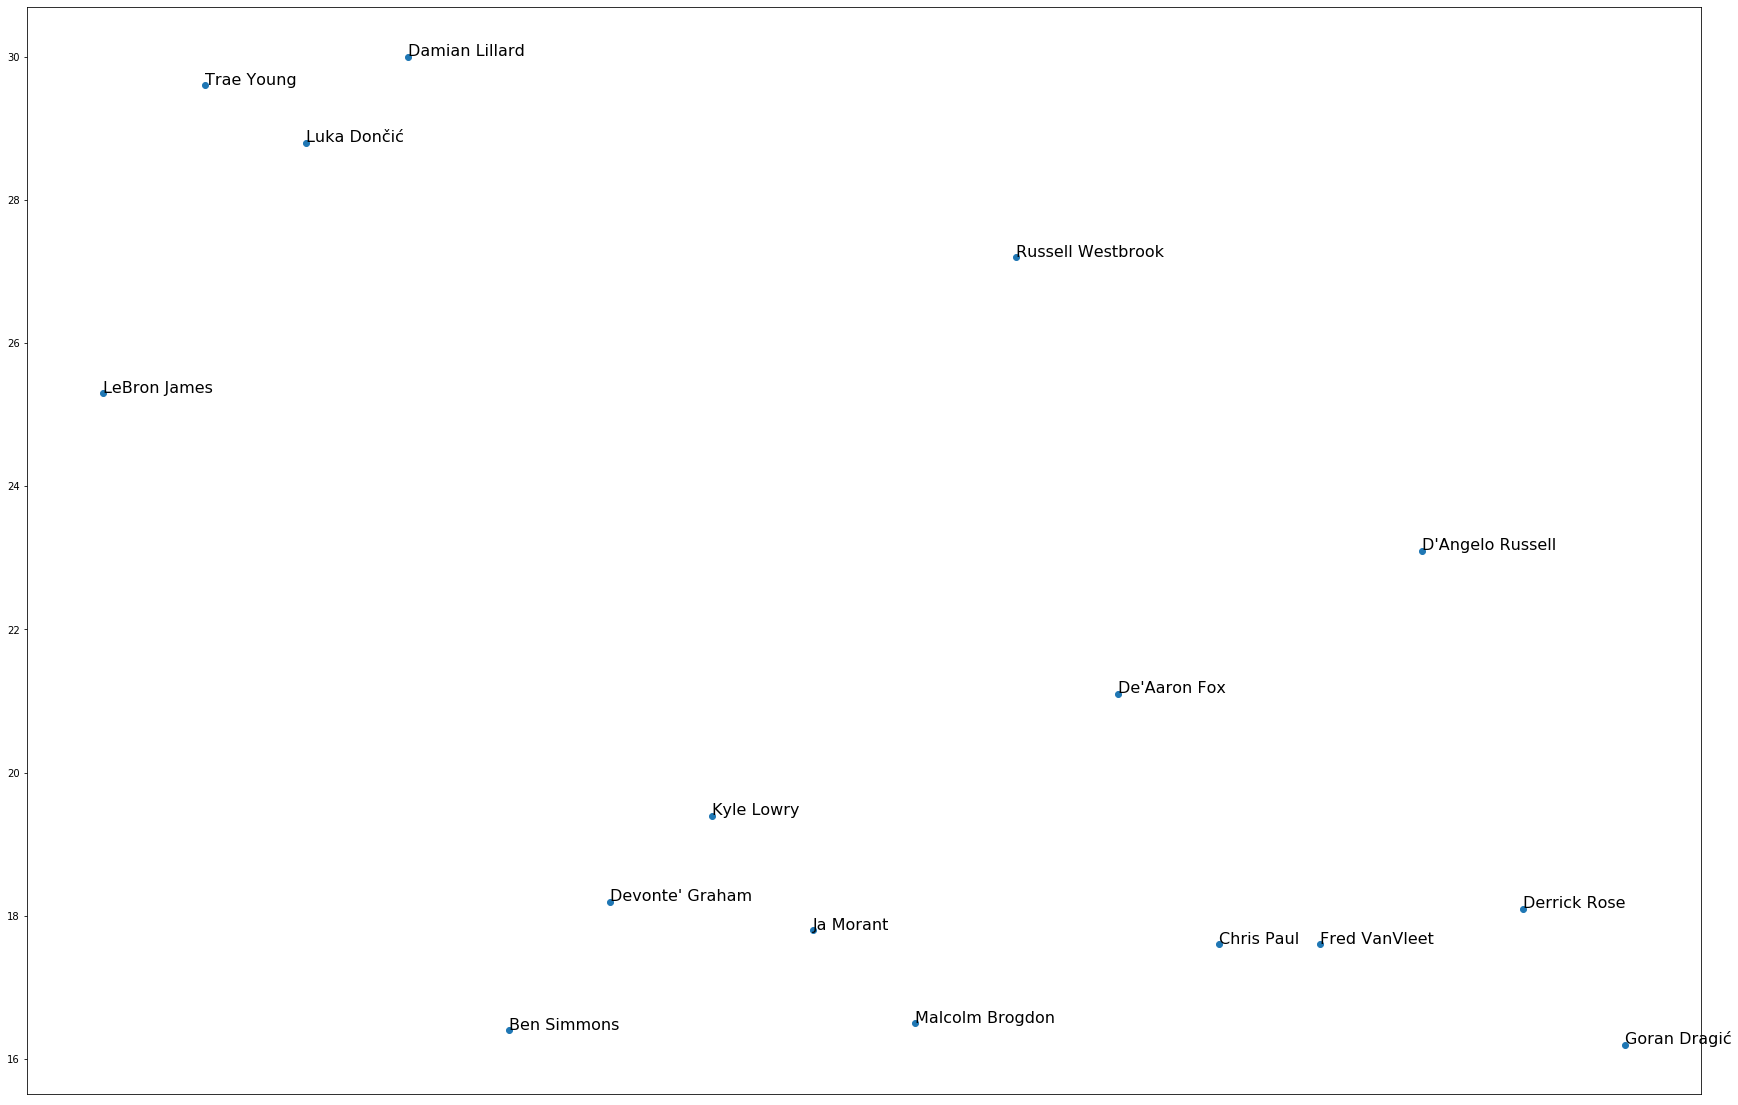

In [19]:
plt.figure(figsize=(30,20))
x = np.array(df_gpg['Player'])
y = np.array(df_gpgr['PTS'])
plt.scatter(x,y)
for i,j in zip(x,y):
    plt.annotate(i,(i,j+0.01),size=16,)
plt.xticks([])

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  


([], <a list of 0 Text xticklabel objects>)

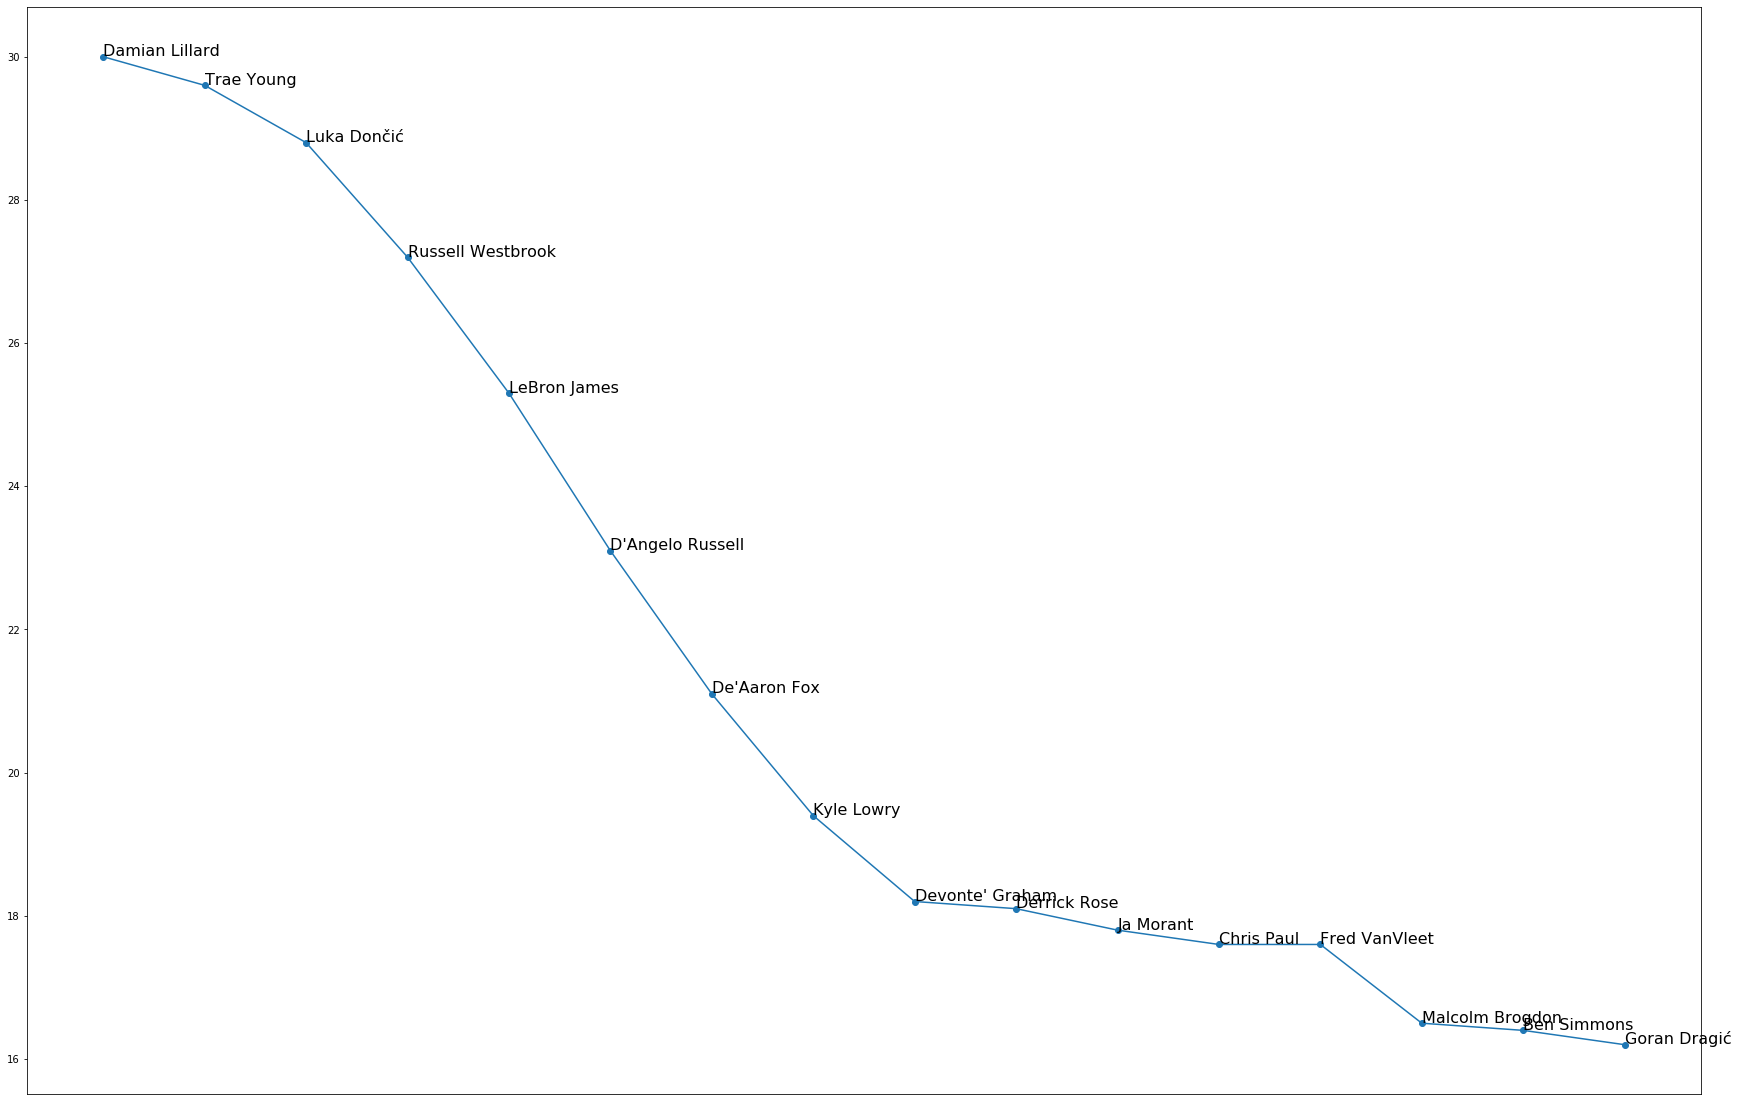

In [20]:
df_gpg.sort_values(by='PTS',inplace=True,ascending=False)
df_gpgr.sort_index(by='PTS',inplace=True,ascending=False)
plt.figure(figsize=(30,20))
x = np.array(df_gpg['Player'])
y = np.array(df_gpgr['PTS'])
plt.scatter(x,y)
plt.plot(x,y)
for i,j in zip(x,y):
    plt.annotate(i,(i,j+0.01),size=16,)
plt.xticks([])

['Damian Lillard' 'Trae Young' 'Luka Dončić' 'Russell Westbrook'
 'LeBron James' "D'Angelo Russell" "De'Aaron Fox" 'Kyle Lowry'
 "Devonte' Graham" 'Derrick Rose' 'Ja Morant' 'Chris Paul' 'Fred VanVleet'
 'Malcolm Brogdon' 'Ben Simmons' 'Goran Dragić']


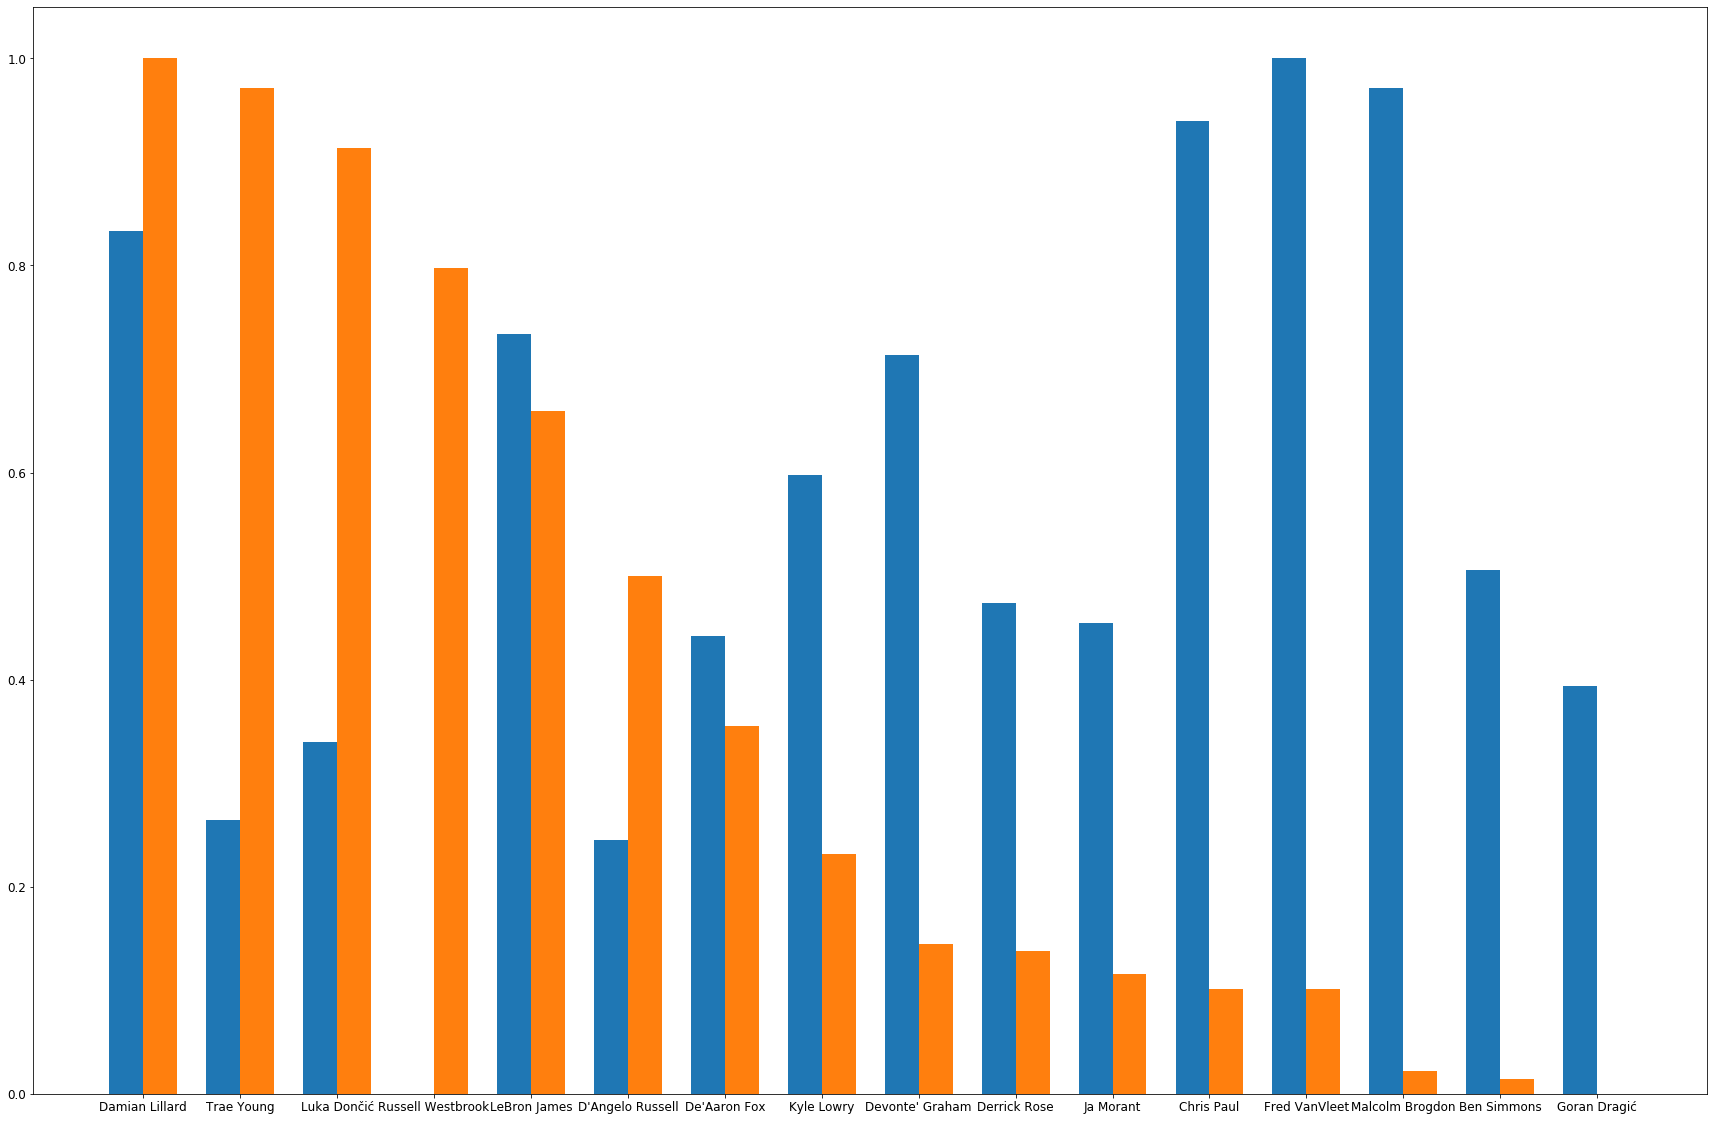

In [21]:
matplotlib.rc('ytick',labelsize=12)
matplotlib.rc('xtick',labelsize=12)
plt.figure(figsize=(30,20))
x_label = np.array(df_gpg['Player'])
y = np.array(df_gpgr['A/T_r'])
x = np.arange(len(x_label))
width = 0.35
plt.bar(x-width/2,y,width=width)
# for i,j in zip(x,y):
#     plt.annotate(i,(i,j),size=15)
print(x_label)
plt.xticks(label=x_label)
# plt.annotate(np.array(df_gpg['Player'])[0],(0,np.array(df_gpg['A/T'])[0]))
y_0 = np.array(df_gpgr['PTS_r'])
# fig, ax = plt.subplots()
# rects1 = ax.bar(x,y,label='a/t_per_game')
# rects2 = ax.bar(x,y_0,label='pts_per_game')
plt.bar(x+width/2,y_0,width=width)
plt.xticks(x,x_label)
y_mean = [np.mean(y) for item in y]
y_0_mean = [np.mean(y_0) for item in y_0]
# plt.plot(x,y_mean,'r')
# plt.plot(x,y_0_mean,'b')
plt.show()

In [22]:
sum_ = np.array(df_gpgr['PTS_r'])+np.array(df_gpgr['A/T_r'])
score = [i/np.max(sum_)*100 for i in sum_]
df_gpgr['score'] = score
df_gpgr.sort_values(by='score',inplace=True,ascending=True)
df_gpgr

,Player,AST_r,PTS_r,A/T_r,AST,PTS,A/T,score
2,Goran Dragić,0.000000,0.000000,0.394231,5.1,16.2,2.125000,21.508683
12,Ben Simmons,0.568627,0.014493,0.505495,8.0,16.4,2.285714,28.369782
8,Ja Morant,0.431373,0.115942,0.454545,7.3,17.8,2.212121,31.125005
10,Derrick Rose,0.098039,0.137681,0.473846,5.6,18.1,2.240000,33.364081
11,D'Angelo Russell,0.235294,0.500000,0.244755,6.3,23.1,1.909091,40.632811
3,De'Aaron Fox,0.333333,0.355072,0.441687,6.8,21.1,2.193548,43.470108
14,Russell Westbrook,0.372549,0.797101,0.000000,7.0,27.2,1.555556,43.488748
7,Kyle Lowry,0.470588,0.231884,0.598015,7.5,19.4,2.419355,45.278134
4,Devonte' Graham,0.470588,0.144928,0.713528,7.5,18.2,2.586207,46.836133
0,Malcolm Brogdon,0.392157,0.021739,0.971154,7.1,16.5,2.958333,54.170861


<BarContainer object of 16 artists>

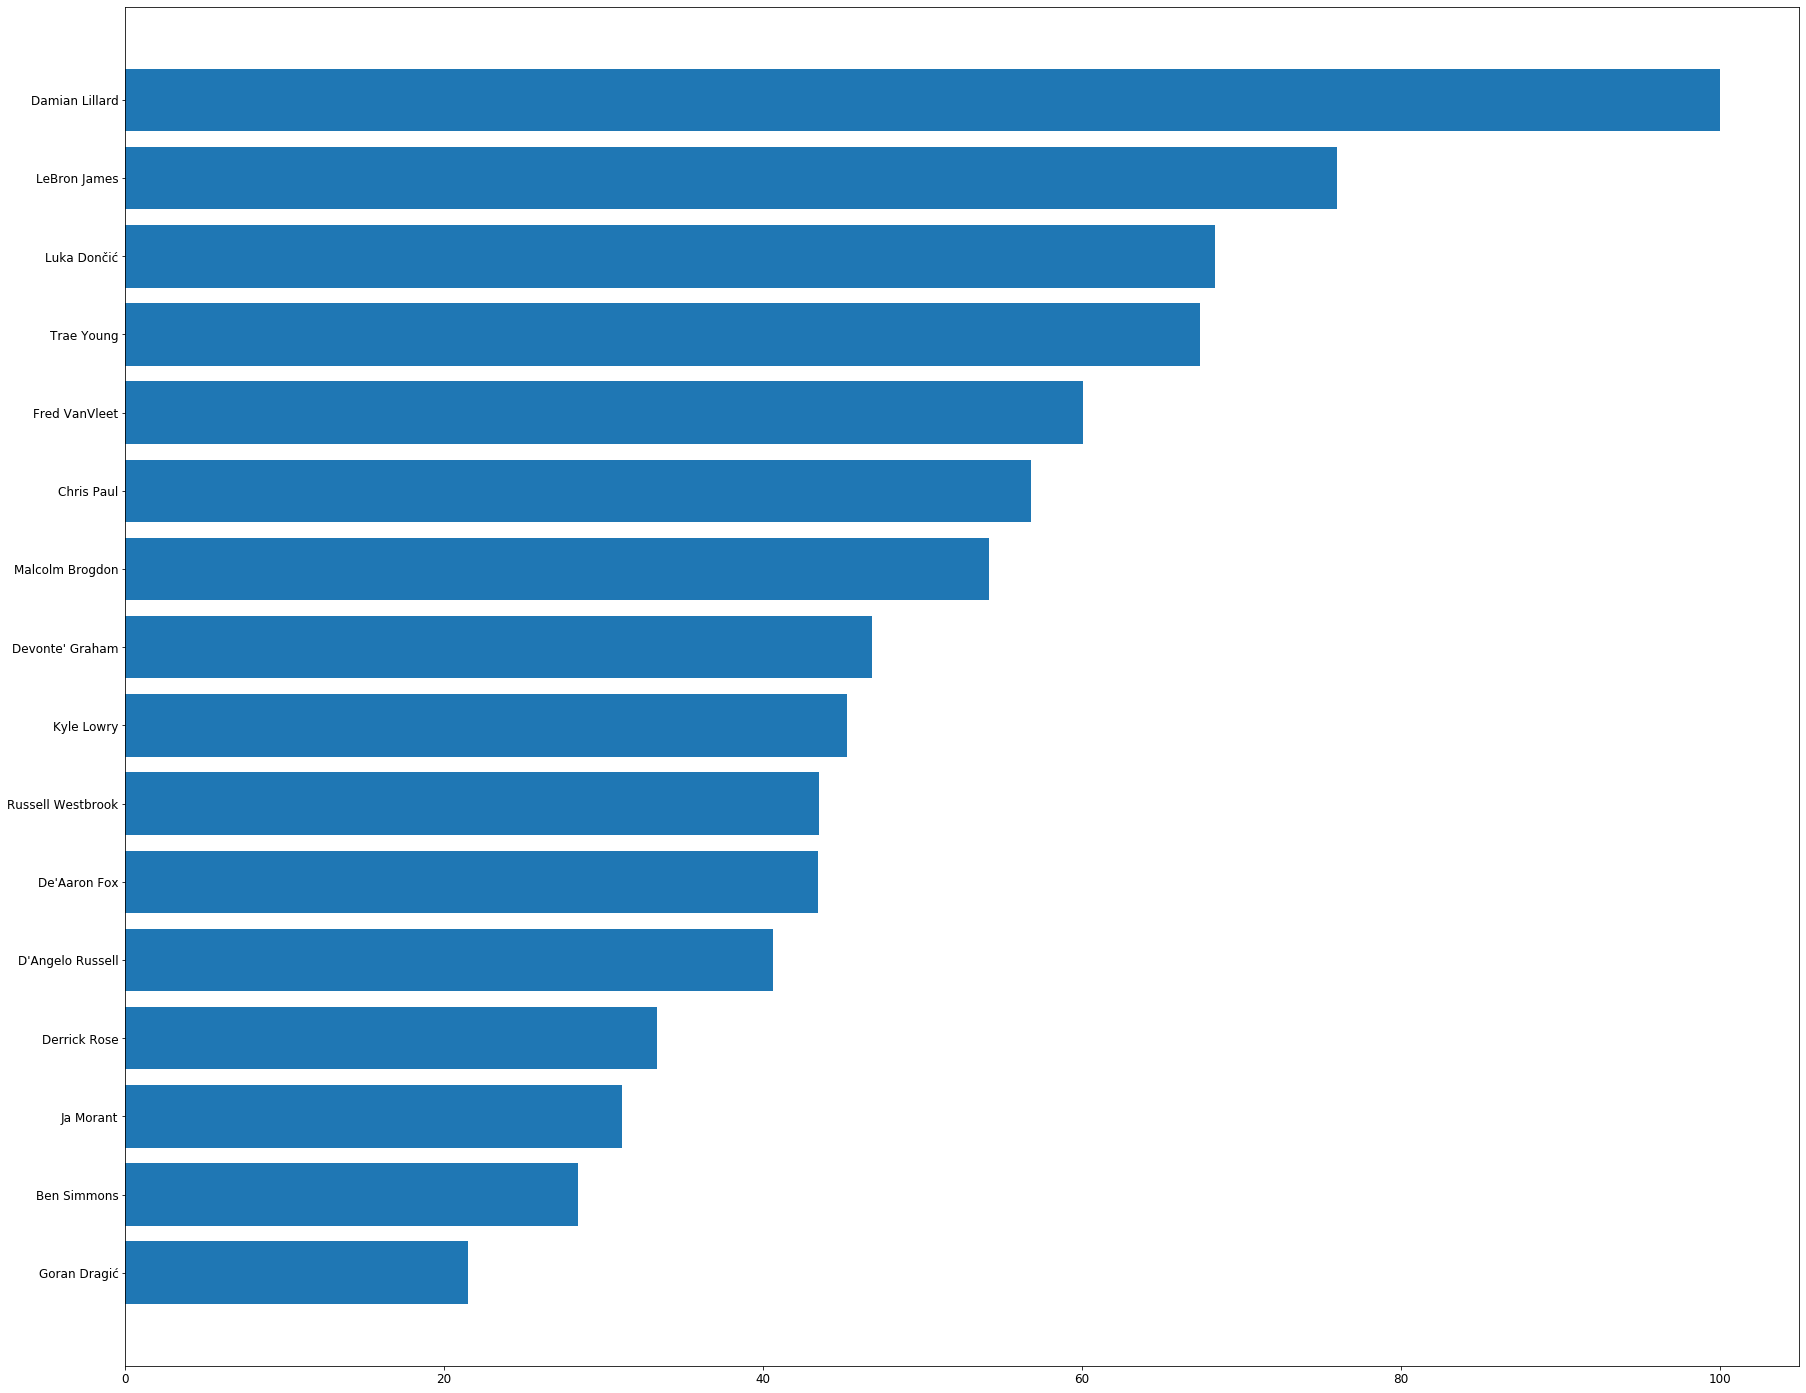

In [23]:
plt.figure(figsize=(30,25))
x = df_gpgr['Player']
y = df_gpgr['score']
plt.barh(x,y)

In [24]:
sum_ = np.array(df_gpgr['PTS_r'])*0.4+np.array(df_gpgr['A/T_r'])*0.6
score = [i/np.max(sum_)*100 for i in sum_]
df_gpgr['score'] = score
df_gpgr.sort_values(by='score',inplace=True,ascending=True)
df_gpgr

,Player,AST_r,PTS_r,A/T_r,AST,PTS,A/T,score
2,Goran Dragić,0.000000,0.000000,0.394231,5.1,16.2,2.125000,26.289800
12,Ben Simmons,0.568627,0.014493,0.505495,8.0,16.4,2.285714,34.353881
14,Russell Westbrook,0.372549,0.797101,0.000000,7.0,27.2,1.555556,35.437175
8,Ja Morant,0.431373,0.115942,0.454545,7.3,17.8,2.212121,35.466462
10,Derrick Rose,0.098039,0.137681,0.473846,5.6,18.1,2.240000,37.720023
11,D'Angelo Russell,0.235294,0.500000,0.244755,6.3,23.1,1.909091,38.550600
3,De'Aaron Fox,0.333333,0.355072,0.441687,6.8,21.1,2.193548,45.240155
7,Kyle Lowry,0.470588,0.231884,0.598015,7.5,19.4,2.419355,50.188409
4,Devonte' Graham,0.470588,0.144928,0.713528,7.5,18.2,2.586207,54.025670
15,Trae Young,0.823529,0.971014,0.264423,9.3,29.6,1.937500,60.802325


<BarContainer object of 16 artists>

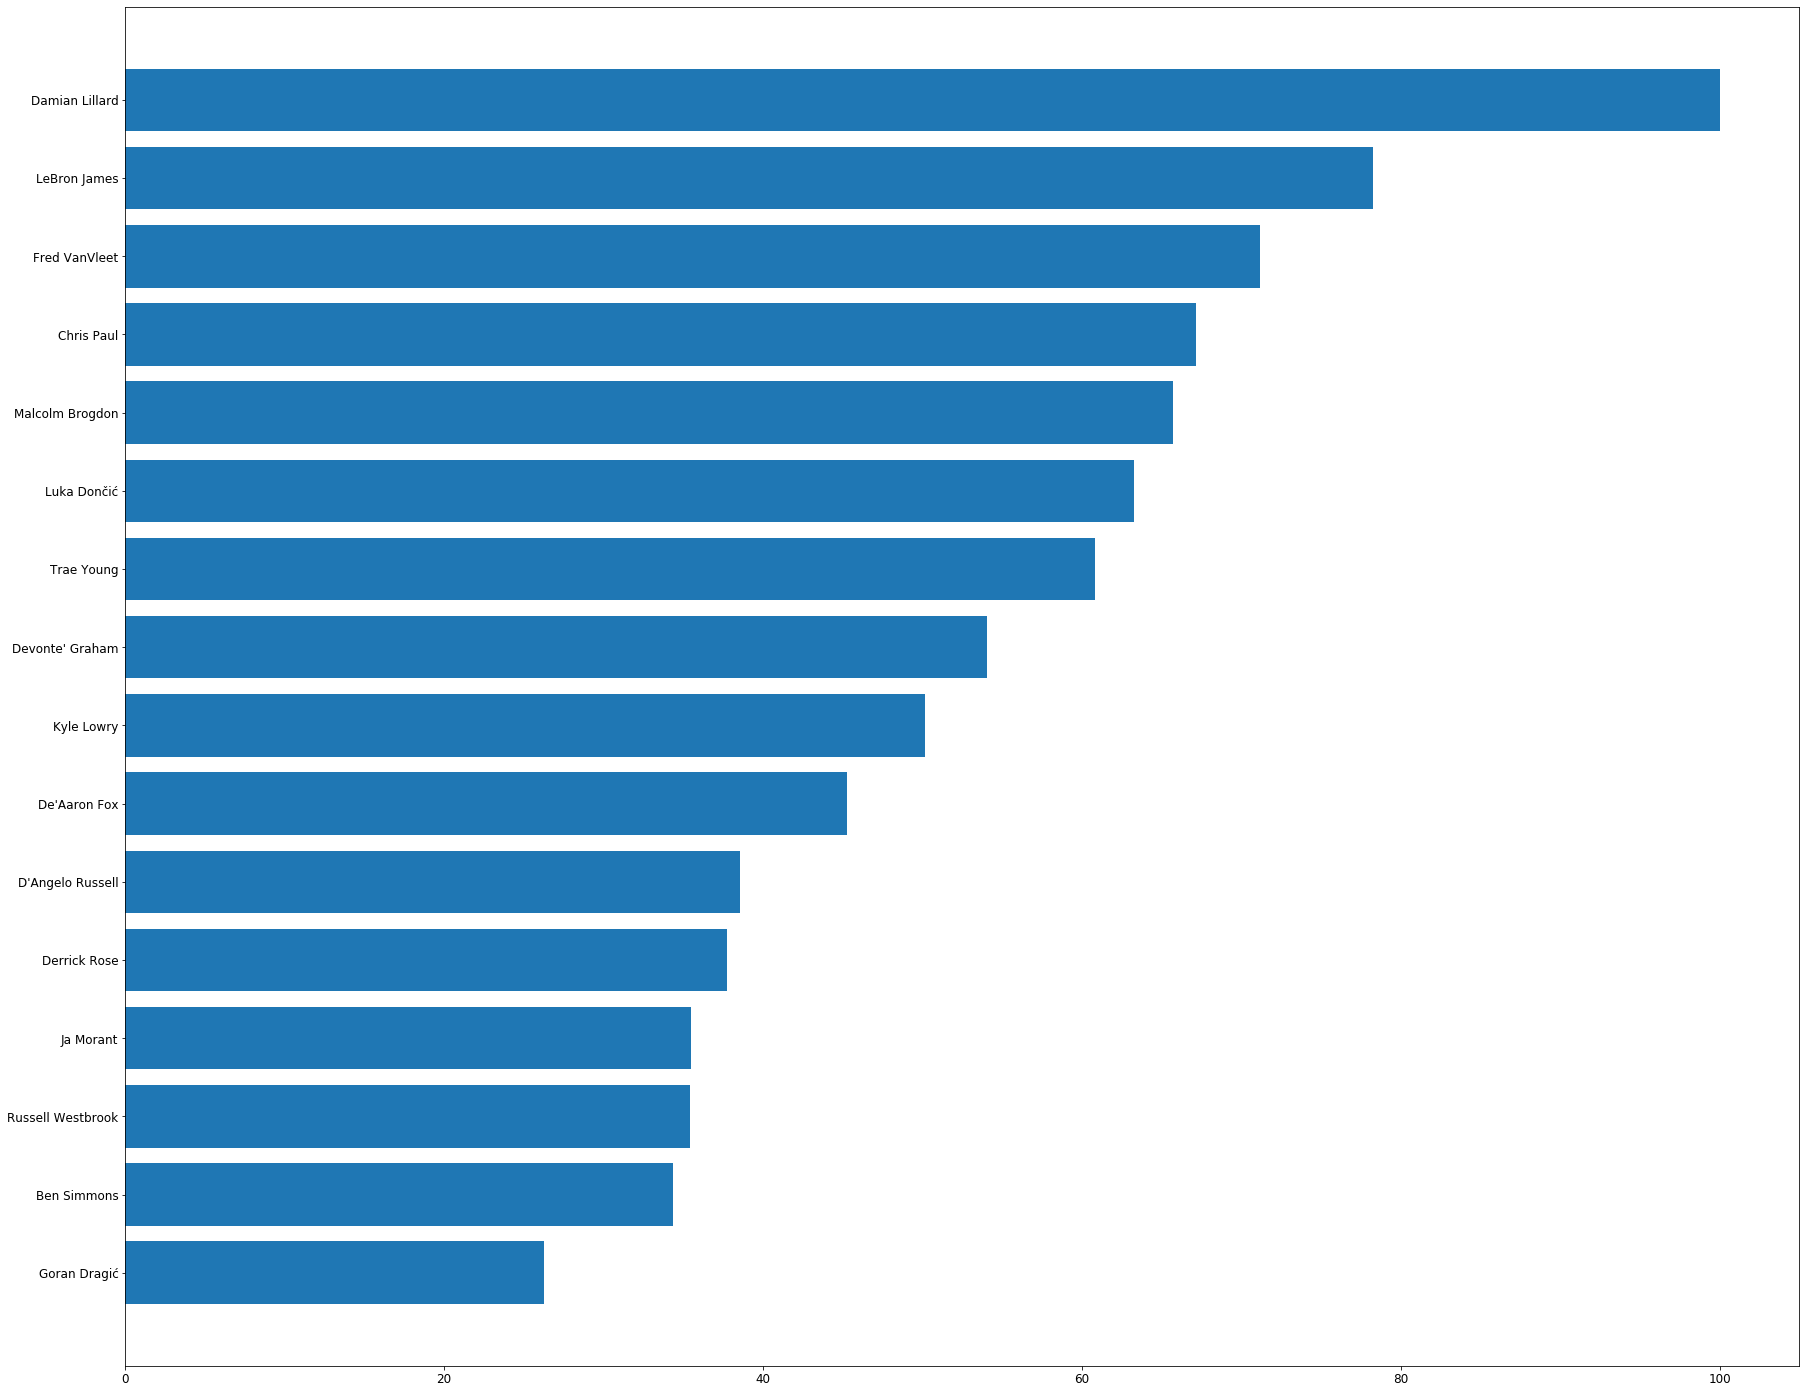

In [25]:
plt.figure(figsize=(30,25))
x = df_gpgr['Player']
y = df_gpgr['score']
plt.barh(x,y)

In [26]:
sum_ = np.array(df_gpgr['PTS_r'])*0.6+np.array(df_gpgr['A/T_r'])*0.4
score = [i/np.max(sum_)*100 for i in sum_]
df_gpgr['score'] = score
df_gpgr.sort_values(by='score',inplace=True,ascending=True)
df_gpgr

,Player,AST_r,PTS_r,A/T_r,AST,PTS,A/T,score
2,Goran Dragić,0.000000,0.000000,0.394231,5.1,16.2,2.125000,16.898806
12,Ben Simmons,0.568627,0.014493,0.505495,8.0,16.4,2.285714,22.600009
8,Ja Morant,0.431373,0.115942,0.454545,7.3,17.8,2.212121,26.939040
10,Derrick Rose,0.098039,0.137681,0.473846,5.6,18.1,2.240000,29.164150
4,Devonte' Graham,0.470588,0.144928,0.713528,7.5,18.2,2.586207,39.904096
7,Kyle Lowry,0.470588,0.231884,0.598015,7.5,19.4,2.419355,40.543723
3,De'Aaron Fox,0.333333,0.355072,0.441687,6.8,21.1,2.193548,41.763457
11,D'Angelo Russell,0.235294,0.500000,0.244755,6.3,23.1,1.909091,42.640447
0,Malcolm Brogdon,0.392157,0.021739,0.971154,7.1,16.5,2.958333,43.026547
9,Chris Paul,0.313725,0.101449,0.939799,6.7,17.6,2.913043,46.807722


<BarContainer object of 16 artists>

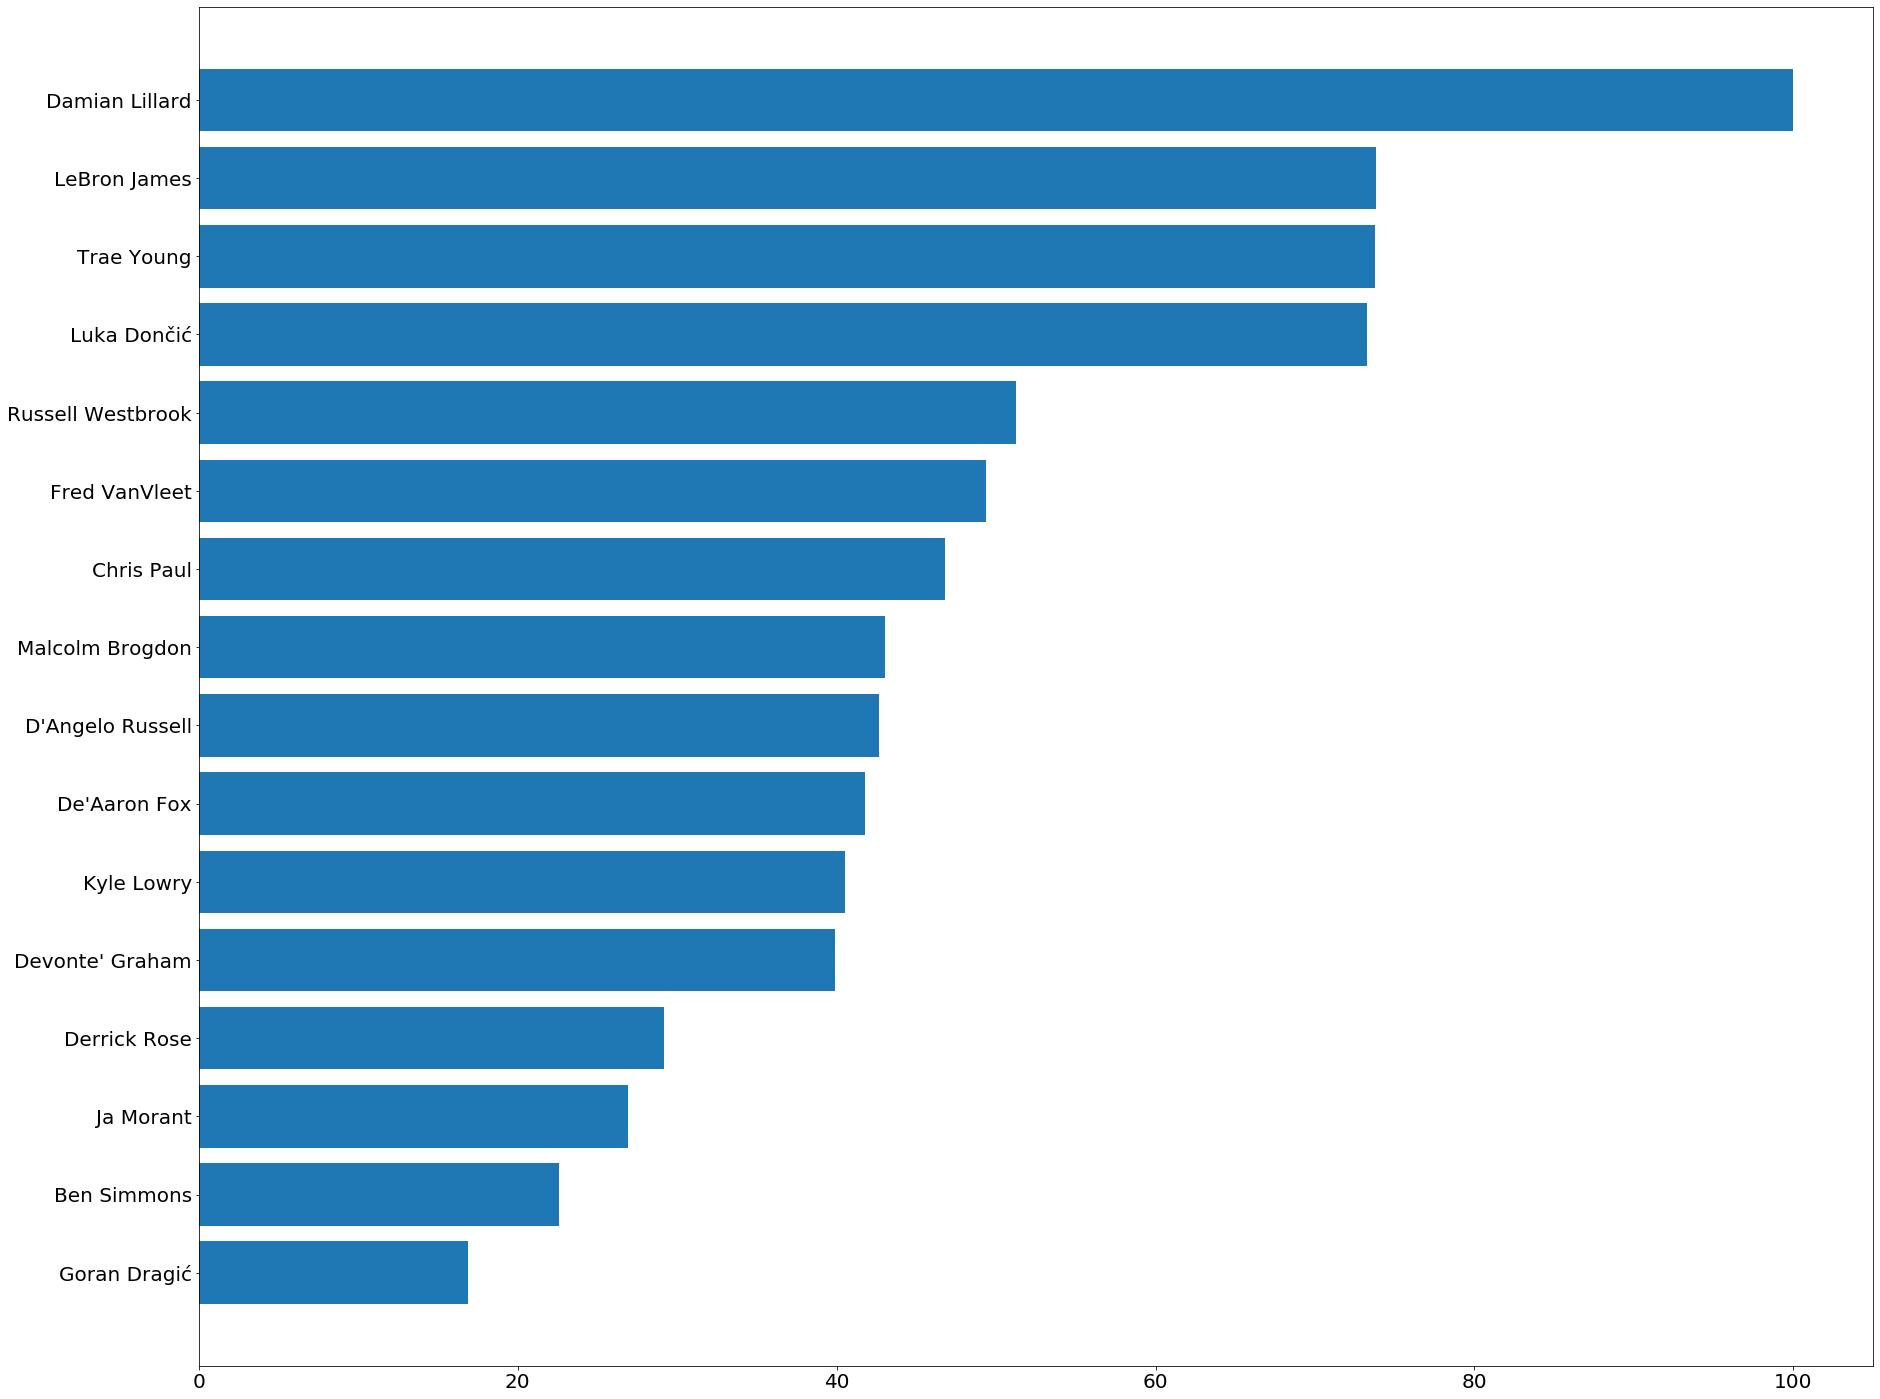

In [30]:
matplotlib.rc('xtick',labelsize=20)
matplotlib.rc('ytick', labelsize=20) 
plt.figure(figsize=(30,25))
x = df_gpgr['Player']
y = df_gpgr['score']
plt.barh(x,y)